In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
transfers = pd.read_csv('data/all_incoming_transfers.csv')

In [3]:
matches = pd.read_csv('data/all_league_matches.csv')

In [4]:
league_tables = pd.read_csv('data/league_tables.csv')
league_tables.season = league_tables.season.replace({'2017/18': '2017/2018'})
league_tables.season.unique()

array(['2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015',
       '2015/2016', '2016/2017', '2017/2018', '2018/2019'], dtype=object)

In [5]:
league_tables.to_excel('data/league_tables_final.xlsx', index = False)

In [6]:
transfers.head()

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
0,2009,2009/2010,Man United,Antonio Valencia,23,Right Back,Wigan,£17.01m,22.453,English Premier League
1,2009,2009/2010,Man United,Mame Diouf,21,Striker,Molde FK,£4.05m,5.346,English Premier League
2,2009,2009/2010,Man United,Gabriel Obertan,20,Right Winger,Bordeaux,£3.60m,4.752,English Premier League
3,2009,2009/2010,Man United,Michael Owen,29,Striker,Newcastle,free_transfer,0.000,English Premier League
4,2009,2009/2010,Liverpool,Glen Johnson,24,Right Back,Portsmouth,£18.45m,24.354,English Premier League


In [7]:
matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2010-08-14,English Premier League,Aston Villa,West Ham,3,0,H,23.0,12.0,11.0,2.0,16.0,7.0,15.0,15.0,1.0,2.0,0.0,0.0
1,2010-08-14,English Premier League,Blackburn,Everton,1,0,H,7.0,17.0,2.0,12.0,1.0,3.0,19.0,14.0,2.0,1.0,0.0,0.0
2,2010-08-14,English Premier League,Bolton,Fulham,0,0,D,13.0,12.0,9.0,7.0,4.0,8.0,12.0,13.0,1.0,3.0,0.0,0.0
3,2010-08-14,English Premier League,Chelsea,West Brom,6,0,H,18.0,10.0,13.0,4.0,3.0,1.0,10.0,10.0,1.0,0.0,0.0,0.0
4,2010-08-14,English Premier League,Sunderland,Birmingham,2,2,D,6.0,13.0,2.0,7.0,3.0,6.0,13.0,10.0,3.0,3.0,1.0,0.0


In [8]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10848 entries, 0 to 10847
Data columns (total 10 columns):
year                   10848 non-null int64
season                 10848 non-null object
buying_club            10848 non-null object
player_name            10848 non-null object
age                    10848 non-null int64
position               10848 non-null object
selling_club           10848 non-null object
fee                    10846 non-null object
fee_in_millions_usd    10848 non-null float64
league_name            10848 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 847.6+ KB


In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16434 entries, 0 to 16433
Data columns (total 19 columns):
date                    16434 non-null object
league_name             16434 non-null object
home_team               16434 non-null object
away_team               16434 non-null object
home_goals              16434 non-null int64
away_goals              16434 non-null int64
result                  16434 non-null object
home_shots              16432 non-null float64
away_shots              16432 non-null float64
home_shots_on_target    16432 non-null float64
away_shots_on_target    16432 non-null float64
home_corners            16432 non-null float64
away_corners            16432 non-null float64
home_fouls              16430 non-null float64
away_fouls              16430 non-null float64
home_yellow_cards       16431 non-null float64
away_yellow_cards       16432 non-null float64
home_red_cards          16432 non-null float64
away_red_cards          16432 non-null float64
dtypes:

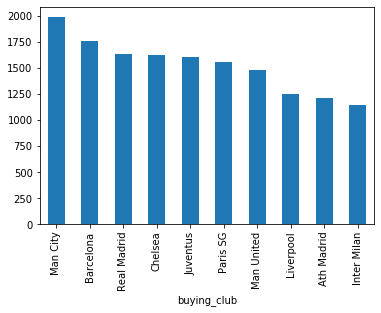

In [10]:
transfers.groupby('buying_club').fee_in_millions_usd.sum().nlargest(10).plot(kind = 'bar')

In [11]:
transfers.selling_club = transfers.selling_club.replace({'Bor. Dortmund': 'Dortmund'})

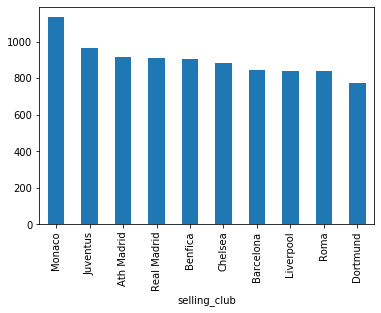

In [12]:
transfers.groupby('selling_club').fee_in_millions_usd.sum().nlargest(10).plot(kind = 'bar')

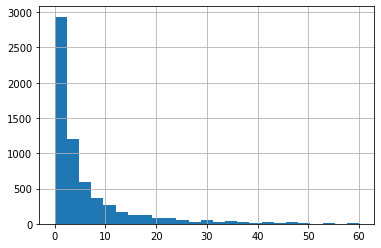

In [13]:
transfers[(transfers.fee_in_millions_usd > 0) & (transfers.fee_in_millions_usd < 60)].fee_in_millions_usd.hist(bins = 25)

In [14]:
leicester_transfers = transfers[transfers.buying_club == 'Leicester']
leicester_transfers.head()

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
965,2014,2014/2015,Leicester,Leonardo Ulloa,27,Striker,Brighton,£9.09m,11.999,English Premier League
966,2014,2014/2015,Leicester,Andrej Kramaric,23,Striker,HNK Rijeka,£8.10m,10.692,English Premier League
967,2014,2014/2015,Leicester,Danny Simpson,27,Right Back,QPR,£2.25m,2.970,English Premier League
968,2014,2014/2015,Leicester,Tom Lawrence,20,Left Winger,Man Utd U23,£1.13m,1.492,English Premier League
969,2014,2014/2015,Leicester,Ben Hamer,26,Goalkeeper,Charlton,free_transfer,0.000,English Premier League


In [15]:
leicester_transfers[leicester_transfers.year == 2015]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1195,2015,2015/2016,Leicester,Shinji Okazaki,29,Striker,Mainz,£9.90m,13.068,English Premier League
1196,2015,2015/2016,Leicester,N'Golo Kante,24,Center Midfielder,Caen,£8.10m,10.692,English Premier League
1197,2015,2015/2016,Leicester,Gokhan Inler,31,Defensive Midfielder,Napoli,£6.30m,8.316,English Premier League
1198,2015,2015/2016,Leicester,Yohan Benalouane,28,Center Back,Atalanta,£6.30m,8.316,English Premier League
1199,2015,2015/2016,Leicester,Daniel Amartey,21,Defensive Midfielder,FC Copenhagen,£5.94m,7.841,English Premier League
1200,2015,2015/2016,Leicester,Demarai Gray,19,Left Winger,Birmingham,£4.59m,6.059,English Premier League
1201,2015,2015/2016,Leicester,Robert Huth,30,Center Back,Stoke,£3.78m,4.990,English Premier League
1202,2015,2015/2016,Leicester,Christian Fuchs,29,Left Back,Schalke 04,free_transfer,0.000,English Premier League
1203,2015,2015/2016,Leicester,Nathan Dyer,27,Right Winger,Swansea,loan,0.000,English Premier League


In [16]:
leicester_transfers[leicester_transfers.year == 2016]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1288,2016,2016/2017,Leicester,Islam Slimani,28,Striker,Sporting CP,£27.45m,36.234,English Premier League
1289,2016,2016/2017,Leicester,Ahmed Musa,23,Striker,CSKA Moscow,£17.55m,23.166,English Premier League
1290,2016,2016/2017,Leicester,Wilfred Ndidi,20,Defensive Midfielder,KRC Genk,£15.84m,20.909,English Premier League
1291,2016,2016/2017,Leicester,Nampalys Mendy,24,Defensive Midfielder,Nice,£13.95m,18.414,English Premier League
1292,2016,2016/2017,Leicester,Bartosz Kapustka,19,Attacking Midfielder,Cracovia Krakow,£4.50m,5.940,English Premier League
1293,2016,2016/2017,Leicester,Ron-Robert Zieler,27,Goalkeeper,Hannover,£3.15m,4.158,English Premier League
1294,2016,2016/2017,Leicester,Luis Hernandez,27,Center Back,Sp Gijon,free_transfer,0.000,English Premier League
1295,2016,2016/2017,Leicester,Molla Wague,25,Center Back,Granada,loan,0.000,English Premier League


In [17]:
matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2010-08-14,English Premier League,Aston Villa,West Ham,3,0,H,23.0,12.0,11.0,2.0,16.0,7.0,15.0,15.0,1.0,2.0,0.0,0.0
1,2010-08-14,English Premier League,Blackburn,Everton,1,0,H,7.0,17.0,2.0,12.0,1.0,3.0,19.0,14.0,2.0,1.0,0.0,0.0
2,2010-08-14,English Premier League,Bolton,Fulham,0,0,D,13.0,12.0,9.0,7.0,4.0,8.0,12.0,13.0,1.0,3.0,0.0,0.0
3,2010-08-14,English Premier League,Chelsea,West Brom,6,0,H,18.0,10.0,13.0,4.0,3.0,1.0,10.0,10.0,1.0,0.0,0.0,0.0
4,2010-08-14,English Premier League,Sunderland,Birmingham,2,2,D,6.0,13.0,2.0,7.0,3.0,6.0,13.0,10.0,3.0,3.0,1.0,0.0


In [18]:
matches[matches.home_team == 'Leicester'].away_goals.sum()

107

In [19]:
matches.groupby(['home_team', 'away_team'])['away_goals', 'home_goals'].sum().head()

away_goals  home_goals
home_team  away_team                        
AC Ajaccio Auxerre             1           2
           Bastia              1           1
           Bordeaux            3           2
           Brest               0           1
           Caen                2           2

In [20]:
leicester_matches = matches[(matches['away_team'].str.contains('Leicester')) | (matches['home_team'].str.contains('Leicester'))]
leicester_matches

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
1521,2014-08-16,English Premier League,Leicester,Everton,2,2,D,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0
1531,2014-08-23,English Premier League,Chelsea,Leicester,2,0,H,27.0,6.0,10.0,4.0,8.0,7.0,11.0,11.0,0.0,1.0,0.0,0.0
1548,2014-08-31,English Premier League,Leicester,Arsenal,1,1,D,9.0,24.0,3.0,6.0,5.0,10.0,14.0,6.0,3.0,1.0,0.0,0.0
1555,2014-09-13,English Premier League,Stoke,Leicester,0,1,A,24.0,8.0,4.0,1.0,13.0,3.0,8.0,15.0,3.0,0.0,0.0,0.0
1567,2014-09-21,English Premier League,Leicester,Man United,5,3,H,15.0,16.0,5.0,5.0,2.0,4.0,11.0,9.0,1.0,1.0,0.0,1.0
1572,2014-09-27,English Premier League,Crystal Palace,Leicester,2,0,H,16.0,7.0,6.0,1.0,6.0,6.0,14.0,9.0,0.0,2.0,0.0,0.0
1582,2014-10-04,English Premier League,Leicester,Burnley,2,2,D,15.0,10.0,6.0,4.0,9.0,3.0,16.0,12.0,2.0,2.0,0.0,0.0
1595,2014-10-18,English Premier League,Newcastle,Leicester,1,0,H,19.0,7.0,6.0,2.0,10.0,7.0,13.0,15.0,0.0,3.0,0.0,0.0
1603,2014-10-25,English Premier League,Swansea,Leicester,2,0,H,7.0,9.0,3.0,4.0,2.0,2.0,7.0,10.0,0.0,0.0,0.0,0.0
1614,2014-11-01,English Premier League,Leicester,West Brom,0,1,A,14.0,8.0,5.0,3.0,8.0,3.0,5.0,12.0,0.0,1.0,0.0,0.0


In [21]:
leicester_matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
1521,2014-08-16,English Premier League,Leicester,Everton,2,2,D,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0
1531,2014-08-23,English Premier League,Chelsea,Leicester,2,0,H,27.0,6.0,10.0,4.0,8.0,7.0,11.0,11.0,0.0,1.0,0.0,0.0
1548,2014-08-31,English Premier League,Leicester,Arsenal,1,1,D,9.0,24.0,3.0,6.0,5.0,10.0,14.0,6.0,3.0,1.0,0.0,0.0
1555,2014-09-13,English Premier League,Stoke,Leicester,0,1,A,24.0,8.0,4.0,1.0,13.0,3.0,8.0,15.0,3.0,0.0,0.0,0.0
1567,2014-09-21,English Premier League,Leicester,Man United,5,3,H,15.0,16.0,5.0,5.0,2.0,4.0,11.0,9.0,1.0,1.0,0.0,1.0


In [22]:
leicester_matches['total_goals'] = leicester_matches['home_goals'] + leicester_matches['away_goals']

C:\Users\1saml\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
leicester_matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,total_goals
1521,2014-08-16,English Premier League,Leicester,Everton,2,2,D,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0,4
1531,2014-08-23,English Premier League,Chelsea,Leicester,2,0,H,27.0,6.0,10.0,4.0,8.0,7.0,11.0,11.0,0.0,1.0,0.0,0.0,2
1548,2014-08-31,English Premier League,Leicester,Arsenal,1,1,D,9.0,24.0,3.0,6.0,5.0,10.0,14.0,6.0,3.0,1.0,0.0,0.0,2
1555,2014-09-13,English Premier League,Stoke,Leicester,0,1,A,24.0,8.0,4.0,1.0,13.0,3.0,8.0,15.0,3.0,0.0,0.0,0.0,1
1567,2014-09-21,English Premier League,Leicester,Man United,5,3,H,15.0,16.0,5.0,5.0,2.0,4.0,11.0,9.0,1.0,1.0,0.0,1.0,8


In [24]:
leicester_matches[(leicester_matches.home_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].away_goals.sum()

18

In [25]:
leicester_matches[(leicester_matches.away_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].home_goals.sum()

18

In [26]:
leicester_matches[(leicester_matches['away_team'].str.contains('Leicester')) | (leicester_matches['home_team'].str.contains('Leicester'))]

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,total_goals
1521,2014-08-16,English Premier League,Leicester,Everton,2,2,D,11.0,13.0,3.0,3.0,3.0,6.0,16.0,10.0,1.0,1.0,0.0,0.0,4
1531,2014-08-23,English Premier League,Chelsea,Leicester,2,0,H,27.0,6.0,10.0,4.0,8.0,7.0,11.0,11.0,0.0,1.0,0.0,0.0,2
1548,2014-08-31,English Premier League,Leicester,Arsenal,1,1,D,9.0,24.0,3.0,6.0,5.0,10.0,14.0,6.0,3.0,1.0,0.0,0.0,2
1555,2014-09-13,English Premier League,Stoke,Leicester,0,1,A,24.0,8.0,4.0,1.0,13.0,3.0,8.0,15.0,3.0,0.0,0.0,0.0,1
1567,2014-09-21,English Premier League,Leicester,Man United,5,3,H,15.0,16.0,5.0,5.0,2.0,4.0,11.0,9.0,1.0,1.0,0.0,1.0,8
1572,2014-09-27,English Premier League,Crystal Palace,Leicester,2,0,H,16.0,7.0,6.0,1.0,6.0,6.0,14.0,9.0,0.0,2.0,0.0,0.0,2
1582,2014-10-04,English Premier League,Leicester,Burnley,2,2,D,15.0,10.0,6.0,4.0,9.0,3.0,16.0,12.0,2.0,2.0,0.0,0.0,4
1595,2014-10-18,English Premier League,Newcastle,Leicester,1,0,H,19.0,7.0,6.0,2.0,10.0,7.0,13.0,15.0,0.0,3.0,0.0,0.0,1
1603,2014-10-25,English Premier League,Swansea,Leicester,2,0,H,7.0,9.0,3.0,4.0,2.0,2.0,7.0,10.0,0.0,0.0,0.0,0.0,2
1614,2014-11-01,English Premier League,Leicester,West Brom,0,1,A,14.0,8.0,5.0,3.0,8.0,3.0,5.0,12.0,0.0,1.0,0.0,0.0,1


In [27]:
leicester_matches[(leicester_matches.home_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].home_goals.sum() \
+ leicester_matches[(leicester_matches.away_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].away_goals.sum()

68

In [28]:
leicester_matches[(leicester_matches.away_team == 'Leicester') & (leicester_matches.date < '2016-07-01') &
                  (leicester_matches.date > '2015-07-01')].away_goals.sum()

33

In [29]:
leicester_matches.loc[leicester_matches['away_team'] == "Leicester", 'away_goals'].sum() \
+ leicester_matches.loc[leicester_matches['home_team'] == "Leicester", 'home_goals'].sum()

269

In [30]:
def goals_scored(team_name, min_date, max_date):
    matches[(matches.home_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].home_goals.sum() \
+ matches[(matches.away_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].away_goals.sum()
    return (matches[(matches.home_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].home_goals.sum() \
+ matches[(matches.away_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].away_goals.sum())

In [31]:
goals_scored('Leicester', '2015-08-08', '2016-05-15')

68

In [32]:
def goals_conceded(team_name, min_date, max_date):
    matches[(matches.home_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].away_goals.sum() \
+ matches[(matches.away_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].home_goals.sum()
    return (matches[(matches.home_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].away_goals.sum() \
+ matches[(matches.away_team == team_name) & (matches.date >= min_date) &
                  (matches.date <= max_date)].home_goals.sum())

In [33]:
goals_conceded('Leicester', '2015-08-08', '2016-05-15')

36

In [34]:
goals_scored('Leicester', '2016-07-01', '2017-07-01')

48

In [35]:
goals_conceded('Leicester', '2016-07-01', '2017-07-01')

63

In [36]:
goals_scored('Barcelona', '2016-07-01', '2017-07-01')

116

In [37]:
goals_conceded('Barcelona', '2016-08-01', '2017-06-01')

37

In [38]:
pd.set_option("display.max_rows", 999)

In [39]:
transfers[transfers.buying_club == "AC Milan"].sort_values(by = 'fee_in_millions_usd', ascending = False).head(10)

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
8036,2017,2017/2018,AC Milan,Leonardo Bonucci,30,Center Back,Juventus,£37.80m,49.896,Italian Serie A
8037,2017,2017/2018,AC Milan,Andre Silva,21,Striker,FC Porto,£34.20m,45.144,Italian Serie A
8320,2018,2018/2019,AC Milan,Lucas Paqueta,21,Attacking Midfielder,Flamengo,£31.50m,41.580,Italian Serie A
8319,2018,2018/2019,AC Milan,Krzysztof Piatek,23,Striker,Genoa,£31.50m,41.580,Italian Serie A
8318,2018,2018/2019,AC Milan,Mattia Caldara,24,Center Back,Juventus,£31.50m,41.580,Italian Serie A
7375,2015,2015/2016,AC Milan,Carlos Bacca,28,Striker,Sevilla,£27.00m,35.640,Italian Serie A
7376,2015,2015/2016,AC Milan,Alessio Romagnoli,20,Center Back,Roma,£22.50m,29.700,Italian Serie A
8321,2018,2018/2019,AC Milan,Samu Castillejo,23,Right Winger,Villarreal,£22.50m,29.700,Italian Serie A
8602,2019,2019/2020,AC Milan,Franck Kessie,22,Center Midfielder,Atalanta,£21.60m,28.512,Italian Serie A
5867,2011,2011/2012,AC Milan,Zlatan Ibrahimovic,29,Striker,Barcelona,£21.60m,28.512,Italian Serie A


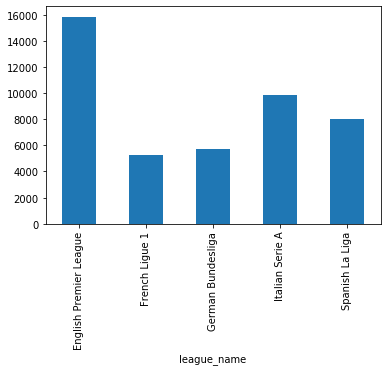

In [40]:
transfers.groupby(['league_name']).fee_in_millions_usd.sum().plot(kind = 'bar')

In [41]:
transfers.buying_club.unique()

array(['Man United', 'Liverpool', 'Chelsea', 'Arsenal', 'Everton',
       'Aston Villa', 'Fulham', 'Tottenham', 'West Ham', 'Man City',
       'Wigan', 'Stoke', 'Bolton', 'Portsmouth', 'Blackburn',
       'Sunderland', 'Hull', 'Wolves', 'Birmingham', 'Burnley',
       'Newcastle', 'West Brom', 'Blackpool', 'QPR', 'Norwich', 'Swansea',
       'Southampton', 'Reading', 'Cardiff', 'Crystal Palace', 'Leicester',
       'Bournemouth', 'Watford', 'Middlesbrough', 'Brighton',
       'Huddersfield', 'Sheffield United', 'Bordeaux', 'Monaco',
       'Marseille', 'Rennes', 'Auxerre', 'Toulouse', 'Nice', 'Paris SG',
       'St Etienne', 'Sochaux', 'Lens', 'Montpellier', 'Lyon', 'Lille',
       'Lorient', 'Nancy', 'Le Mans', 'Grenoble', 'Valenciennes',
       'Boulogne', 'Caen', 'Brest', 'Arles', 'AC Ajaccio', 'Dijon',
       'Evian', 'Bastia', 'Troyes', 'Reims', 'Guingamp', 'Nantes', 'Metz',
       'Angers', 'Ajaccio GFCO', 'Amiens', 'Strasbourg', 'Nimes',
       'Hertha Berlin', 'Bochum', 'Wolfsb

In [42]:
league_tables.head()

,season,league_name,finish,team_name,points
0,2010/2011,English Premier League,1,Man United,80
1,2010/2011,English Premier League,2,Chelsea,71
2,2010/2011,English Premier League,3,Man City,71
3,2010/2011,English Premier League,4,Arsenal,68
4,2010/2011,English Premier League,5,Tottenham,62


In [43]:
top_4_finishes = league_tables[league_tables.finish.isin([1,2,3,4])]

In [44]:
top_4_finishes.head()

,season,league_name,finish,team_name,points
0,2010/2011,English Premier League,1,Man United,80
1,2010/2011,English Premier League,2,Chelsea,71
2,2010/2011,English Premier League,3,Man City,71
3,2010/2011,English Premier League,4,Arsenal,68
20,2010/2011,French Ligue 1,1,Lille,76


In [45]:
top_4_finishes.tail()

,season,league_name,finish,team_name,points
849,2018/2019,Italian Serie A,4,Inter Milan,69
866,2018/2019,Spanish La Liga,1,Barcelona,87
867,2018/2019,Spanish La Liga,2,Ath Madrid,76
868,2018/2019,Spanish La Liga,3,Real Madrid,68
869,2018/2019,Spanish La Liga,4,Valencia,61


In [46]:
top_4_finishes.team_name.value_counts()

Bayern Munich        9
Paris SG             9
Barcelona            9
Real Madrid          9
Man City             8
Lyon                 8
Dortmund             8
Juventus             8
Napoli               7
Ath Madrid           7
Chelsea              6
Leverkusen           6
Man United           5
Roma                 5
Monaco               5
Arsenal              5
Valencia             5
Marseille            4
Liverpool            4
Tottenham            4
Lille                4
Schalke 04           4
Inter Milan          4
B Monchengladbach    3
Nice                 3
Fiorentina           3
AC Milan             3
Atalanta             2
St Etienne           2
Villarreal           2
RB Leipzig           2
Hoffenheim           2
Lazio                2
Udinese              2
Wolfsburg            1
Walsall              1
Wigan                1
Malaga               1
Montpellier          1
Hannover             1
Ath Bilbao           1
Millwall             1
Burton Albion        1
Sociedad   

In [47]:
league_winners = top_4_finishes[top_4_finishes.finish == 1]
league_winners

,season,league_name,finish,team_name,points
0,2010/2011,English Premier League,1,Man United,80
20,2010/2011,French Ligue 1,1,Lille,76
40,2010/2011,German Bundesliga,1,Dortmund,75
58,2010/2011,Italian Serie A,1,AC Milan,82
78,2010/2011,Spanish La Liga,1,Barcelona,96
98,2011/2012,English Premier League,1,Man City,89
118,2011/2012,French Ligue 1,1,Montpellier,82
138,2011/2012,German Bundesliga,1,Dortmund,81
156,2011/2012,Italian Serie A,1,Juventus,84
176,2011/2012,Spanish La Liga,1,Real Madrid,100


In [48]:
league_winners.team_name.value_counts()

Juventus         8
Bayern Munich    7
Barcelona        6
Paris SG         6
Man City         4
Dortmund         2
Chelsea          2
Real Madrid      2
Man United       2
Lille            1
Ath Madrid       1
Montpellier      1
Wigan            1
AC Milan         1
Monaco           1
Name: team_name, dtype: int64

In [49]:
transfers[(transfers.buying_club == 'Montpellier') & (transfers.season == '2011/2012')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
2238,2011,2011/2012,Montpellier,Henri Bedimo,27,Left Back,Lens,£1.80m,2.376,French Ligue 1
2239,2011,2011/2012,Montpellier,Jonathan Tinhan,22,Striker,Grenoble,free_transfer,0.000,French Ligue 1
2240,2011,2011/2012,Montpellier,Hilton,33,Center Back,Marseille,free_transfer,0.000,French Ligue 1


In [50]:
transfers[(transfers.buying_club == 'Monaco') & (transfers.season == '2016/2017')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
2981,2016,2016/2017,Monaco,Djibril Sidibe,23,Right Back,Lille,£13.50m,17.820,French Ligue 1
2982,2016,2016/2017,Monaco,Benjamin Mendy,21,Left Back,Marseille,£11.70m,15.444,French Ligue 1
2983,2016,2016/2017,Monaco,Kamil Glik,28,Center Back,Torino,£9.90m,13.068,French Ligue 1
2984,2016,2016/2017,Monaco,Jorge,20,Left Back,Flamengo,£7.65m,10.098,French Ligue 1
2985,2016,2016/2017,Monaco,Youssef Ait Bennasser,19,Center Midfielder,AS Nancy,£2.70m,3.564,French Ligue 1
2986,2016,2016/2017,Monaco,Morgan De Sanctis,39,Goalkeeper,Roma,free_transfer,0.000,French Ligue 1


In [51]:
goals_scored('Monaco', '2016-07-01', '2017-07-01')

107

In [52]:
goals_scored('Monaco', '2015-07-01', '2016-07-01')

57

In [53]:
goals_conceded('Monaco', '2016-07-01', '2017-07-01')

31

In [54]:
goals_conceded('Monaco', '2015-07-01', '2016-07-01')

50

In [55]:
transfers[(transfers.selling_club == 'Monaco') & (transfers.season == '2017/2018')]


,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1469,2017,2017/2018,Chelsea,Tiemoue Bakayoko,22,Defensive Midfielder,Monaco,£36.00m,47.520,English Premier League
1484,2017,2017/2018,Man City,Benjamin Mendy,23,Left Back,Monaco,£51.75m,68.310,English Premier League
1486,2017,2017/2018,Man City,Bernardo Silva,22,Right Winger,Monaco,£45.00m,59.400,English Premier League
1522,2017,2017/2018,Southampton,Guido Carrillo,26,Striker,Monaco,£19.80m,26.136,English Premier League
1642,2017,2017/2018,Huddersfield,Terence Kongolo,23,Center Back,Monaco,loan,0.000,English Premier League
3156,2017,2017/2018,Amiens,Lacina Traore,27,Striker,Monaco,loan,0.000,French Ligue 1
3178,2017,2017/2018,Bordeaux,Soualiho Meite,23,Center Midfielder,Monaco,loan,0.000,French Ligue 1
3186,2017,2017/2018,Caen,Youssef Ait Bennasser,21,Center Midfielder,Monaco,loan,0.000,French Ligue 1
3228,2017,2017/2018,Marseille,Valere Germain,27,Striker,Monaco,£7.20m,9.504,French Ligue 1
3269,2017,2017/2018,Nice,Allan Saint-Maximin,20,Right Winger,Monaco,£9.00m,11.880,French Ligue 1


In [56]:
transfers[(transfers.buying_club == 'Ath Madrid') & (transfers.season == '2013/2014')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
9356,2013,2013/2014,Ath Madrid,Josuha Guilavogui,22,Defensive Midfielder,Saint-Etienne,£9.00m,11.880,Spanish La Liga
9357,2013,2013/2014,Ath Madrid,Toby Alderweireld,24,Center Back,Ajax,£6.30m,8.316,Spanish La Liga
9358,2013,2013/2014,Ath Madrid,Leo Baptistao,20,Right Winger,Vallecano,£6.30m,8.316,Spanish La Liga
9359,2013,2013/2014,Ath Madrid,Roberto,27,Goalkeeper,Benfica,£5.40m,7.128,Spanish La Liga
9360,2013,2013/2014,Ath Madrid,David Villa,31,Striker,Barcelona,£1.89m,2.495,Spanish La Liga
9361,2013,2013/2014,Ath Madrid,Diego,28,Attacking Midfielder,Wolfsburg,£1.35m,1.782,Spanish La Liga
9362,2013,2013/2014,Ath Madrid,Jose Sosa,28,Center Midfielder,Metalist,loan,1.782,Spanish La Liga
9363,2013,2013/2014,Ath Madrid,Jose Gimenez,18,Center Back,Danubio FC,£810k,1.069,Spanish La Liga
9364,2013,2013/2014,Ath Madrid,Daniel Aranzubia,33,Goalkeeper,Dep. La Coruna,free_transfer,0.000,Spanish La Liga
9365,2013,2013/2014,Ath Madrid,Martin Demichelis,32,Center Back,Malaga,free_transfer,0.000,Spanish La Liga


In [57]:
transfers[(transfers.selling_club == 'Ath Madrid') & (transfers.season == '2014/2015')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
926,2014,2014/2015,Chelsea,Diego Costa,25,Striker,Ath Madrid,£34.20m,45.144,English Premier League
929,2014,2014/2015,Chelsea,Filipe Luis,28,Left Back,Ath Madrid,£18.00m,23.760,English Premier League
985,2014,2014/2015,Liverpool,Javier Manquillo,20,Right Back,Ath Madrid,loan,2.376,English Premier League
1035,2014,2014/2015,Southampton,Toby Alderweireld,25,Center Back,Ath Madrid,loan,0.000,English Premier League
4457,2014,2014/2015,Wolfsburg,Josuha Guilavogui,23,Defensive Midfielder,Ath Madrid,loan,8.078,German Bundesliga
7092,2014,2014/2015,AC Milan,Alessio Cerci,27,Right Winger,Ath Madrid,loan,0.000,Italian Serie A
7140,2014,2014/2015,Parma,Cristian Rodriguez,29,Center Midfielder,Ath Madrid,loan,0.000,Italian Serie A
7201,2014,2014/2015,Torino,Ruben Perez,25,Defensive Midfielder,Ath Madrid,loan,0.594,Italian Serie A
9589,2014,2014/2015,Villarreal,Sergio Asenjo,25,Goalkeeper,Ath Madrid,£4.50m,5.940,Spanish La Liga
9640,2014,2014/2015,Vallecano,Leo Baptistao,21,Right Winger,Ath Madrid,loan,0.000,Spanish La Liga


In [58]:
league_winners[(league_winners.team_name == 'Real Madrid') | (league_winners.team_name == 'Dortmund') | (league_winners.team_name == 'Chelsea')]

,season,league_name,finish,team_name,points
40,2010/2011,German Bundesliga,1,Dortmund,75
138,2011/2012,German Bundesliga,1,Dortmund,81
176,2011/2012,Spanish La Liga,1,Real Madrid,100
392,2014/2015,English Premier League,1,Chelsea,87
592,2016/2017,English Premier League,1,Chelsea,93
670,2016/2017,Spanish La Liga,1,Real Madrid,93


In [59]:
league_winners[league_winners.team_name == 'Real Madrid']

,season,league_name,finish,team_name,points
176,2011/2012,Spanish La Liga,1,Real Madrid,100
670,2016/2017,Spanish La Liga,1,Real Madrid,93


In [60]:
transfers[(transfers.buying_club == 'Real Madrid') & (transfers.season == '2016/2017')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
9990,2016,2016/2017,Real Madrid,Alvaro Morata,23,Striker,Juventus,£27.00m,35.64,Spanish La Liga


In [61]:
transfers[transfers.buying_club == 'Monaco'].fee_in_millions_usd.sum()

918.874

In [62]:
transfers[transfers.selling_club == 'Monaco'].fee_in_millions_usd.sum()

1133.163

In [63]:
league_tables[league_tables.team_name == 'Monaco']

,season,league_name,finish,team_name,points
37,2010/2011,French Ligue 1,18,Monaco,44
315,2013/2014,French Ligue 1,2,Monaco,80
414,2014/2015,French Ligue 1,3,Monaco,71
516,2015/2016,French Ligue 1,3,Monaco,65
612,2016/2017,French Ligue 1,1,Monaco,95
691,2017/2018,French Ligue 1,2,Monaco,80
824,2018/2019,French Ligue 1,17,Monaco,36


In [64]:
league_tables[league_tables.team_name == 'Leicester']

,season,league_name,finish,team_name,points
405,2014/2015,English Premier League,14,Leicester,41
603,2016/2017,English Premier League,12,Leicester,44
718,2017/2018,English Premier League,9,Leicester,47
796,2018/2019,English Premier League,9,Leicester,52


In [65]:
top_4_finishes[top_4_finishes.team_name == 'RB Leipzig']

,season,league_name,finish,team_name,points
633,2016/2017,German Bundesliga,2,RB Leipzig,67
830,2018/2019,German Bundesliga,3,RB Leipzig,66


In [66]:
transfers[(transfers.buying_club == 'RB Leipzig') & (transfers.season == '2016/2017')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
4909,2016,2016/2017,RB Leipzig,Naby Keita,21,Center Midfielder,RB Salzburg,£26.78m,35.350,German Bundesliga
4910,2016,2016/2017,RB Leipzig,Oliver Burke,19,Right Winger,Nottm Forest,£13.68m,18.058,German Bundesliga
4911,2016,2016/2017,RB Leipzig,Timo Werner,20,Striker,Stuttgart,£12.60m,16.632,German Bundesliga
4912,2016,2016/2017,RB Leipzig,Dayot Upamecano,18,Center Back,RB Salzburg,£9.00m,11.880,German Bundesliga
4913,2016,2016/2017,RB Leipzig,Bernardo,21,Left Back,RB Salzburg,£5.40m,7.128,German Bundesliga
4914,2016,2016/2017,RB Leipzig,Marius Muller,22,Goalkeeper,1.FC K'lautern,£1.53m,2.020,German Bundesliga
4915,2016,2016/2017,RB Leipzig,Kyriakos Papadopoulos,24,Center Back,Bay. Leverkusen,loan,1.188,German Bundesliga
4916,2016,2016/2017,RB Leipzig,Benno Schmitz,21,Right Back,RB Salzburg,£720k,0.950,German Bundesliga


In [67]:
transfers[(transfers.selling_club == 'RB Leipzig') & (transfers.season == '2018/2019')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1654,2018,2018/2019,Liverpool,Naby Keita,23,Center Midfielder,RB Leipzig,£54.00m,71.28,English Premier League
1730,2018,2018/2019,Brighton,Bernardo,23,Left Back,RB Leipzig,£9.00m,11.88,English Premier League


In [68]:
top_4_finishes.team_name.value_counts()

Bayern Munich        9
Paris SG             9
Barcelona            9
Real Madrid          9
Man City             8
Lyon                 8
Dortmund             8
Juventus             8
Napoli               7
Ath Madrid           7
Chelsea              6
Leverkusen           6
Man United           5
Roma                 5
Monaco               5
Arsenal              5
Valencia             5
Marseille            4
Liverpool            4
Tottenham            4
Lille                4
Schalke 04           4
Inter Milan          4
B Monchengladbach    3
Nice                 3
Fiorentina           3
AC Milan             3
Atalanta             2
St Etienne           2
Villarreal           2
RB Leipzig           2
Hoffenheim           2
Lazio                2
Udinese              2
Wolfsburg            1
Walsall              1
Wigan                1
Malaga               1
Montpellier          1
Hannover             1
Ath Bilbao           1
Millwall             1
Burton Albion        1
Sociedad   

In [69]:
top_4_finishes[top_4_finishes.team_name == 'Ath Madrid']

,season,league_name,finish,team_name,points
276,2012/2013,Spanish La Liga,3,Ath Madrid,76
372,2013/2014,Spanish La Liga,1,Ath Madrid,90
472,2014/2015,Spanish La Liga,3,Ath Madrid,78
574,2015/2016,Spanish La Liga,3,Ath Madrid,88
672,2016/2017,Spanish La Liga,3,Ath Madrid,78
769,2017/2018,Spanish La Liga,2,Ath Madrid,79
867,2018/2019,Spanish La Liga,2,Ath Madrid,76


In [70]:
purchases = pd.DataFrame(transfers.groupby('buying_club').fee_in_millions_usd.sum())
purchases.head()


,fee_in_millions_usd
buying_club,
AC Ajaccio,0.238
AC Milan,995.688
Ajaccio GFCO,0.000
Alaves,45.607
Almeria,9.979


In [121]:
purchases = pd.DataFrame({'count' : purchases.groupby( [ "buying_club", "fee_in_millions_usd"] ).size()}).reset_index()

KeyError: 'buying_club'

In [72]:
sales = pd.DataFrame(transfers.groupby('selling_club').fee_in_millions_usd.sum())
sales.head()

,fee_in_millions_usd
selling_club,
1.FC Heidenheim,4.811
1.FC K'lautern,26.375
1.FC Koln U19,0.950
1.FC Magdeburg,0.475
1860 Munich,17.464


In [73]:
sales = pd.DataFrame({'count' : sales.groupby( [ "selling_club", "fee_in_millions_usd"] ).size()}).reset_index()
sales.head()

,selling_club,fee_in_millions_usd,count
0,1.FC Heidenheim,4.811,1
1,1.FC K'lautern,26.375,1
2,1.FC Koln U19,0.950,1
3,1.FC Magdeburg,0.475,1
4,1860 Munich,17.464,1


In [74]:
sales = sales.rename(columns = {'selling_club':'club_name', 'fee_in_millions_usd':'total_sales'})
purchases = purchases.rename(columns = {'buying_club':'club_name', 'fee_in_millions_usd':'total_purchases'})

In [125]:
sales.head()

,club_name,total_sales,count
0,1.FC Heidenheim,4.811,1
1,1.FC K'lautern,26.375,1
2,1.FC Koln U19,0.950,1
3,1.FC Magdeburg,0.475,1
4,1860 Munich,17.464,1


In [123]:
purchases.head()

,club_name,total_purchases,count
0,AC Ajaccio,0.238,1
1,AC Milan,995.688,1
2,Ajaccio GFCO,0.000,1
3,Alaves,45.607,1
4,Almeria,9.979,1


In [77]:
club_transfer_totals = purchases.merge(sales, left_on = 'club_name', right_on = 'club_name')
club_transfer_totals = club_transfer_totals.drop(columns = ['count_x', 'count_y'])
club_transfer_totals['profit_or_loss'] = club_transfer_totals.total_sales - club_transfer_totals.total_purchases
club_transfer_totals = club_transfer_totals.sort_values(by = 'profit_or_loss')
club_transfer_totals = club_transfer_totals.reset_index(drop = True)
club_transfer_totals

,club_name,total_purchases,total_sales,profit_or_loss
0,Man City,1987.059,532.086,-1454.973
1,Paris SG,1560.557,499.146,-1061.411
2,Barcelona,1759.759,846.523,-913.236
3,Chelsea,1621.170,881.790,-739.380
4,Real Madrid,1630.240,907.216,-723.024
5,Juventus,1605.770,965.555,-640.215
6,AC Milan,995.688,494.213,-501.475
7,Arsenal,1010.997,514.265,-496.732
8,Bayern Munich,902.285,443.480,-458.805
9,Liverpool,1248.559,839.476,-409.083


In [78]:
club_transfer_totals.to_excel('data/club_transfer_totals.xlsx', index = False)

In [79]:
flops = transfers[(transfers.fee_in_millions_usd >= 20) & (~transfers.buying_club.isin(top_4_finishes.team_name))]

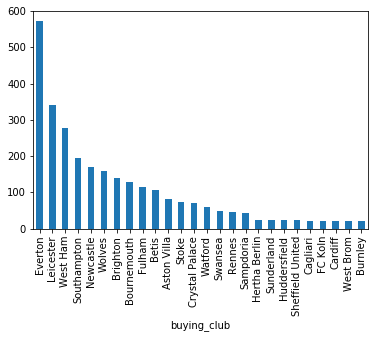

In [80]:
flops.groupby('buying_club').fee_in_millions_usd.sum().sort_values(ascending = False).plot(kind = 'bar')

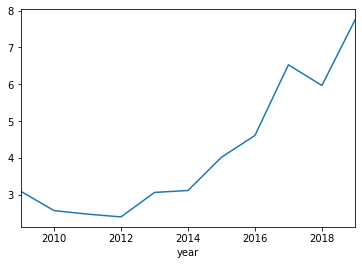

In [81]:
transfers.groupby('year').fee_in_millions_usd.mean().plot()

In [82]:
big_transfers = transfers[transfers.fee_in_millions_usd >= 50]
big_transfers = big_transfers.sort_values(by = 'fee_in_millions_usd', ascending = False)
big_transfers.head()

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
3279,2017,2017/2018,Paris SG,Neymar,25,Left Winger,Barcelona,£199.80m,263.736,French Ligue 1
10218,2017,2017/2018,Barcelona,Philippe Coutinho,25,Left Winger,Liverpool,£130.50m,172.260,Spanish La Liga
3455,2018,2018/2019,Paris SG,Kylian Mbappe,19,Striker,Monaco,£121.50m,160.380,French Ligue 1
10674,2019,2019/2020,Ath Madrid,Joao Felix,19,Striker,Benfica,£113.40m,149.688,Spanish La Liga
10219,2017,2017/2018,Barcelona,Ousmane Dembele,20,Left Winger,Dortmund,£112.50m,148.500,Spanish La Liga


In [83]:
transfers[(transfers.buying_club == 'Lyon') | (transfers.buying_club == 'Dortmund') | (transfers.buying_club == 'Monaco')].age.mean()

23.441176470588236

In [84]:
transfers.age.mean()

24.681692477876105

In [85]:
transfers[(transfers.buying_club == 'Lyon') | (transfers.selling_club == 'Lyon')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
100,2009,2009/2010,Portsmouth,Frederic Piquionne,30,Striker,Lyon,loan,0.594,English Premier League
127,2009,2009/2010,Sunderland,John Mensah,26,Center Back,Lyon,loan,1.782,English Premier League
253,2010,2010/2011,Aston Villa,Jean II Makoun,27,Defensive Midfielder,Lyon,£5.58m,7.366,English Premier League
260,2010,2010/2011,West Ham,Frederic Piquionne,31,Striker,Lyon,£1.08m,1.426,English Premier League
622,2012,2012/2013,Tottenham,Hugo Lloris,25,Goalkeeper,Lyon,£11.34m,14.969,English Premier League
821,2013,2013/2014,Southampton,Dejan Lovren,23,Center Back,Lyon,£9.00m,11.880,English Premier League
1060,2014,2014/2015,Swansea,Bafetimbi Gomis,28,Striker,Lyon,free_transfer,0.000,English Premier League
1122,2015,2015/2016,Tottenham,Clinton N'Jie,22,Striker,Lyon,£12.69m,16.751,English Premier League
1502,2017,2017/2018,Arsenal,Alexandre Lacazette,26,Striker,Lyon,£47.70m,62.964,English Premier League
1806,2019,2019/2020,Tottenham,Tanguy Ndombele,22,Center Midfielder,Lyon,£54.00m,71.280,English Premier League


In [86]:
matches.head()

,date,league_name,home_team,away_team,home_goals,away_goals,result,home_shots,away_shots,home_shots_on_target,away_shots_on_target,home_corners,away_corners,home_fouls,away_fouls,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2010-08-14,English Premier League,Aston Villa,West Ham,3,0,H,23.0,12.0,11.0,2.0,16.0,7.0,15.0,15.0,1.0,2.0,0.0,0.0
1,2010-08-14,English Premier League,Blackburn,Everton,1,0,H,7.0,17.0,2.0,12.0,1.0,3.0,19.0,14.0,2.0,1.0,0.0,0.0
2,2010-08-14,English Premier League,Bolton,Fulham,0,0,D,13.0,12.0,9.0,7.0,4.0,8.0,12.0,13.0,1.0,3.0,0.0,0.0
3,2010-08-14,English Premier League,Chelsea,West Brom,6,0,H,18.0,10.0,13.0,4.0,3.0,1.0,10.0,10.0,1.0,0.0,0.0,0.0
4,2010-08-14,English Premier League,Sunderland,Birmingham,2,2,D,6.0,13.0,2.0,7.0,3.0,6.0,13.0,10.0,3.0,3.0,1.0,0.0


In [87]:
transfers[(transfers.fee_in_millions_usd <= 20) & (transfers.fee_in_millions_usd > 0) & (transfers.buying_club.isin(top_4_finishes.team_name))]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1,2009,2009/2010,Man United,Mame Diouf,21,Striker,Molde FK,£4.05m,5.346,English Premier League
2,2009,2009/2010,Man United,Gabriel Obertan,20,Right Winger,Bordeaux,£3.60m,4.752,English Premier League
6,2009,2009/2010,Liverpool,Sotiris Kyrgiakos,30,Center Back,AEK Athens,£2.70m,3.564,English Premier League
9,2009,2009/2010,Chelsea,Daniel Sturridge,19,Striker,Man City,£6.53m,8.620,English Premier League
10,2009,2009/2010,Chelsea,Nemanja Matic,21,Defensive Midfielder,MFK Kosice,£1.58m,2.086,English Premier League
12,2009,2009/2010,Arsenal,Thomas Vermaelen,23,Center Back,Ajax,£10.80m,14.256,English Premier League
35,2009,2009/2010,Tottenham,Peter Crouch,28,Striker,Portsmouth,£9.45m,12.474,English Premier League
36,2009,2009/2010,Tottenham,Sebastien Bassong,23,Center Back,Newcastle,£8.37m,11.048,English Premier League
37,2009,2009/2010,Tottenham,Kyle Naughton,20,Right Back,Sheffield Utd.,£5.31m,7.009,English Premier League
38,2009,2009/2010,Tottenham,Younes Kaboul,23,Center Back,Portsmouth,£5.31m,7.009,English Premier League


In [88]:
transfers[transfers.buying_club == 'Lyon'].age.value_counts().nlargest(5)

23    7
21    7
20    7
26    6
22    5
Name: age, dtype: int64

In [89]:
transfers[transfers.buying_club == 'Dortmund'].age.value_counts().nlargest(5)

24    10
25     8
20     8
23     7
22     6
Name: age, dtype: int64

In [90]:
transfers[transfers.buying_club == 'Monaco'].age.value_counts().nlargest(5)

21    11
19    11
23    11
20    10
22     9
Name: age, dtype: int64

In [91]:
transfers[transfers.buying_club == 'Barcelona'].age.value_counts().nlargest(5)

22    10
23     6
28     4
27     4
24     4
Name: age, dtype: int64

In [92]:
transfers[transfers.buying_club == 'Paris SG'].age.value_counts().nlargest(5)

27    8
24    8
19    6
29    6
26    5
Name: age, dtype: int64

In [93]:
transfers[transfers.buying_club == 'Liverpool'].age.value_counts().nlargest(5)

24    11
25    10
20     9
23     7
18     6
Name: age, dtype: int64

In [94]:
transfers[(transfers.selling_club == 'Monaco') & (transfers.fee != 'loan') & (transfers.fee != 'free_transfer')].sort_values(by = 'fee_in_millions_usd', ascending = False).head(10)

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
3455,2018,2018/2019,Paris SG,Kylian Mbappe,19,Striker,Monaco,£121.50m,160.380,French Ligue 1
9568,2014,2014/2015,Real Madrid,James Rodriguez,23,Attacking Midfielder,Monaco,£67.50m,89.100,Spanish La Liga
10447,2018,2018/2019,Ath Madrid,Thomas Lemar,22,Left Winger,Monaco,£63.00m,83.160,Spanish La Liga
1114,2015,2015/2016,Man United,Anthony Martial,19,Left Winger,Monaco,£54.00m,71.280,English Premier League
1484,2017,2017/2018,Man City,Benjamin Mendy,23,Left Back,Monaco,£51.75m,68.310,English Premier League
1486,2017,2017/2018,Man City,Bernardo Silva,22,Right Winger,Monaco,£45.00m,59.400,English Premier League
1833,2019,2019/2020,Leicester,Youri Tielemans,22,Center Midfielder,Monaco,£40.50m,53.460,English Premier League
1655,2018,2018/2019,Liverpool,Fabinho,24,Defensive Midfielder,Monaco,£40.50m,53.460,English Premier League
1469,2017,2017/2018,Chelsea,Tiemoue Bakayoko,22,Defensive Midfielder,Monaco,£36.00m,47.520,English Premier League
7352,2015,2015/2016,Inter Milan,Geoffrey Kondogbia,22,Center Midfielder,Monaco,£32.40m,42.768,Italian Serie A


In [95]:
transfers[(transfers.selling_club == 'Lyon') & (transfers.fee != 'loan') & (transfers.fee != 'free_transfer')].sort_values(by = 'fee_in_millions_usd', ascending = False).head(10)

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1806,2019,2019/2020,Tottenham,Tanguy Ndombele,22,Center Midfielder,Lyon,£54.00m,71.280,English Premier League
1502,2017,2017/2018,Arsenal,Alexandre Lacazette,26,Striker,Lyon,£47.70m,62.964,English Premier League
10685,2019,2019/2020,Real Madrid,Ferland Mendy,24,Left Back,Lyon,£43.20m,57.024,Spanish La Liga
4917,2017,2017/2018,Bayern Munich,Corentin Tolisso,22,Center Midfielder,Lyon,£37.35m,49.302,German Bundesliga
8767,2009,2009/2010,Real Madrid,Karim Benzema,21,Striker,Lyon,£31.50m,41.580,Spanish La Liga
9986,2016,2016/2017,Barcelona,Samuel Umtiti,22,Center Back,Lyon,£22.50m,29.700,Spanish La Liga
10568,2018,2018/2019,Real Madrid,Mariano Diaz,25,Striker,Lyon,£19.35m,25.542,Spanish La Liga
3404,2018,2018/2019,Monaco,Willem Geubbels,16,Left Winger,Lyon,£18.00m,23.760,French Ligue 1
10777,2019,2019/2020,Betis,Nabil Fekir,26,Attacking Midfielder,Lyon,£17.78m,23.470,Spanish La Liga
10598,2018,2018/2019,Valencia,Mouctar Diakhaby,21,Center Back,Lyon,£13.50m,17.820,Spanish La Liga


In [96]:
transfers[(transfers.selling_club == 'Dortmund') & (transfers.fee != 'loan') & (transfers.fee != 'free_transfer')].sort_values(by = 'fee_in_millions_usd', ascending = False).head(10)

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
10219,2017,2017/2018,Barcelona,Ousmane Dembele,20,Left Winger,Dortmund,£112.50m,148.500,Spanish La Liga
1658,2018,2018/2019,Chelsea,Christian Pulisic,20,Right Winger,Dortmund,£57.60m,76.032,English Premier League
1501,2017,2017/2018,Arsenal,Pierre-Emerick Aubameyang,28,Striker,Dortmund,£57.38m,75.742,English Premier League
1319,2016,2016/2017,Man United,Henrikh Mkhitaryan,27,Attacking Midfielder,Dortmund,£37.80m,49.896,English Premier League
4286,2013,2013/2014,Bayern Munich,Mario Gotze,21,Attacking Midfielder,Dortmund,£33.30m,43.956,German Bundesliga
4750,2016,2016/2017,Bayern Munich,Mats Hummels,27,Center Back,Dortmund,£31.50m,41.580,German Bundesliga
3625,2019,2019/2020,Paris SG,Abdou Diallo,23,Center Back,Dortmund,£28.80m,38.016,French Ligue 1
1310,2016,2016/2017,Man City,Ilkay Gundogan,25,Center Midfielder,Dortmund,£24.30m,32.076,English Premier League
1711,2018,2018/2019,West Ham,Andrii Yarmolenko,28,Right Winger,Dortmund,£18.00m,23.760,English Premier League
4980,2017,2017/2018,B Monchengladbach,Matthias Ginter,23,Center Back,Dortmund,£15.30m,20.196,German Bundesliga


In [97]:
goals_scored('AC Milan', '2018-07-01', '2019-07-01')

55

In [98]:
goals_conceded('AC Milan', '2018-07-01', '2019-07-01')

36

In [99]:
league_tables[league_tables.team_name == 'AC Milan']

,season,league_name,finish,team_name,points
58,2010/2011,Italian Serie A,1,AC Milan,82
157,2011/2012,Italian Serie A,2,AC Milan,80
256,2012/2013,Italian Serie A,3,AC Milan,72
359,2013/2014,Italian Serie A,8,AC Milan,57
459,2014/2015,Italian Serie A,10,AC Milan,52
558,2015/2016,Italian Serie A,7,AC Milan,57
655,2016/2017,Italian Serie A,6,AC Milan,63
753,2017/2018,Italian Serie A,6,AC Milan,64
850,2018/2019,Italian Serie A,5,AC Milan,68


In [100]:
milan_decline = transfers[(transfers.buying_club == 'AC Milan') & (transfers.year > 2012) & (transfers.fee != 'loan') & (transfers.fee != 'free_transfer')]
milan_decline.groupby('position').fee_in_millions_usd.sum().sort_values(ascending = False)

position
Striker                 212.652
Center Back             183.256
Center Midfielder        94.114
Left Back                47.579
Attacking Midfielder     47.282
Defensive Midfielder     41.818
Left Winger              31.838
Right Winger             31.779
Right Back               28.512
Left Midfielder          20.196
Goalkeeper                1.164
Name: fee_in_millions_usd, dtype: float64

In [101]:
milan_decline[milan_decline.position == 'Center Back']

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
6525,2013,2013/2014,AC Milan,Cristian Zapata,26,Center Back,Villarreal,£5.40m,7.128,Italian Serie A
6527,2013,2013/2014,AC Milan,Jherson Vergara,19,Center Back,Quindio,£1.80m,2.376,Italian Serie A
7079,2014,2014/2015,AC Milan,Adil Rami,28,Center Back,Valencia,£3.83m,5.056,Italian Serie A
7081,2014,2014/2015,AC Milan,Gabriel Paletta,28,Center Back,Parma,£2.25m,2.970,Italian Serie A
7376,2015,2015/2016,AC Milan,Alessio Romagnoli,20,Center Back,Roma,£22.50m,29.700,Italian Serie A
7719,2016,2016/2017,AC Milan,Gustavo Gomez,23,Center Back,Lanus,£7.65m,10.098,Italian Serie A
8036,2017,2017/2018,AC Milan,Leonardo Bonucci,30,Center Back,Juventus,£37.80m,49.896,Italian Serie A
8041,2017,2017/2018,AC Milan,Mateo Musacchio,26,Center Back,Villarreal,£16.20m,21.384,Italian Serie A
8318,2018,2018/2019,AC Milan,Mattia Caldara,24,Center Back,Juventus,£31.50m,41.580,Italian Serie A
8606,2019,2019/2020,AC Milan,Leo Duarte,23,Center Back,Flamengo,£9.90m,13.068,Italian Serie A


In [102]:
club_transfer_totals.sort_values(by = ['total_purchases', 'profit_or_loss'], ascending = False).reset_index(drop = True)

,club_name,total_purchases,total_sales,profit_or_loss
0,Man City,1987.059,532.086,-1454.973
1,Barcelona,1759.759,846.523,-913.236
2,Real Madrid,1630.240,907.216,-723.024
3,Chelsea,1621.170,881.790,-739.380
4,Juventus,1605.770,965.555,-640.215
5,Paris SG,1560.557,499.146,-1061.411
6,Liverpool,1248.559,839.476,-409.083
7,Ath Madrid,1211.254,913.927,-297.327
8,Arsenal,1010.997,514.265,-496.732
9,AC Milan,995.688,494.213,-501.475


In [103]:
league_tables[league_tables.team_name == 'Arsenal']

,season,league_name,finish,team_name,points
3,2010/2011,English Premier League,4,Arsenal,68
100,2011/2012,English Premier League,3,Arsenal,70
199,2012/2013,English Premier League,4,Arsenal,73
297,2013/2014,English Premier League,4,Arsenal,79
394,2014/2015,English Premier League,3,Arsenal,75
596,2016/2017,English Premier League,5,Arsenal,75
715,2017/2018,English Premier League,6,Arsenal,63
792,2018/2019,English Premier League,5,Arsenal,70


In [104]:
league_tables[league_tables.team_name == 'Man United']

,season,league_name,finish,team_name,points
0,2010/2011,English Premier League,1,Man United,80
99,2011/2012,English Premier League,2,Man United,89
196,2012/2013,English Premier League,1,Man United,89
300,2013/2014,English Premier League,7,Man United,64
395,2014/2015,English Premier League,4,Man United,70
597,2016/2017,English Premier League,6,Man United,69
711,2017/2018,English Premier League,2,Man United,81
793,2018/2019,English Premier League,6,Man United,66


In [105]:
man_u = transfers[(transfers.buying_club == 'Man United') & (transfers.fee != 'loan') & (transfers.fee != 'free_transfer')]
man_u

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
0,2009,2009/2010,Man United,Antonio Valencia,23,Right Back,Wigan,£17.01m,22.453,English Premier League
1,2009,2009/2010,Man United,Mame Diouf,21,Striker,Molde FK,£4.05m,5.346,English Premier League
2,2009,2009/2010,Man United,Gabriel Obertan,20,Right Winger,Bordeaux,£3.60m,4.752,English Premier League
237,2010,2010/2011,Man United,Bebe,20,Left Winger,Vit. Guimaraes,£7.92m,10.454,English Premier League
238,2010,2010/2011,Man United,Chris Smalling,20,Center Back,Fulham,£7.20m,9.504,English Premier League
239,2010,2010/2011,Man United,Chicharito,22,Striker,Chivas,£6.75m,8.910,English Premier League
240,2010,2010/2011,Man United,Anders Lindegaard,26,Goalkeeper,Aalesund,£4.50m,5.940,English Premier League
394,2011,2011/2012,Man United,David de Gea,20,Goalkeeper,Ath Madrid,£22.50m,29.700,English Premier League
395,2011,2011/2012,Man United,Phil Jones,19,Center Back,Blackburn,£17.37m,22.928,English Premier League
396,2011,2011/2012,Man United,Ashley Young,25,Left Back,Aston Villa,£16.20m,21.384,English Premier League


In [106]:
man_u[man_u.year > 2012].fee_in_millions_usd.sum()

1242.6359999999997

In [107]:
transfers[(transfers.fee_in_millions_usd <= 10) & (transfers.buying_club.isin(top_4_finishes.team_name)) 
          & (transfers.fee != 'loan') & (transfers.fee != 'free_transfer')]

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1,2009,2009/2010,Man United,Mame Diouf,21,Striker,Molde FK,£4.05m,5.346,English Premier League
2,2009,2009/2010,Man United,Gabriel Obertan,20,Right Winger,Bordeaux,£3.60m,4.752,English Premier League
6,2009,2009/2010,Liverpool,Sotiris Kyrgiakos,30,Center Back,AEK Athens,£2.70m,3.564,English Premier League
9,2009,2009/2010,Chelsea,Daniel Sturridge,19,Striker,Man City,£6.53m,8.620,English Premier League
10,2009,2009/2010,Chelsea,Nemanja Matic,21,Defensive Midfielder,MFK Kosice,£1.58m,2.086,English Premier League
37,2009,2009/2010,Tottenham,Kyle Naughton,20,Right Back,Sheffield Utd.,£5.31m,7.009,English Premier League
38,2009,2009/2010,Tottenham,Younes Kaboul,23,Center Back,Portsmouth,£5.31m,7.009,English Premier League
39,2009,2009/2010,Tottenham,Kyle Walker,19,Right Back,Sheffield Utd.,£5.31m,7.009,English Premier League
40,2009,2009/2010,Tottenham,Niko Kranjcar,25,Attacking Midfielder,Portsmouth,£2.52m,3.326,English Premier League
61,2009,2009/2010,Man City,Adam Johnson,22,Right Winger,Middlesbrough,£7.20m,9.504,English Premier League


In [108]:
transfers[transfers.player_name == 'Eric Dier']

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1069,2014,2014/2015,Tottenham,Eric Dier,20,Defensive Midfielder,Sporting CP,£4.50m,5.94,English Premier League


In [109]:
transfers[transfers.player_name == 'Dele Alli']

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1066,2014,2014/2015,Tottenham,Dele Alli,18,Attacking Midfielder,MK Dons,£5.97m,7.88,English Premier League


In [110]:
goals_scored('Tottenham', '2015-07-01', '2016-07-01')

69

In [111]:
goals_scored('Tottenham', '2014-07-01', '2015-07-01')

58

In [112]:
transfers[transfers.player_name == 'Neymar']

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
3279,2017,2017/2018,Paris SG,Neymar,25,Left Winger,Barcelona,£199.80m,263.736,French Ligue 1
9366,2013,2013/2014,Barcelona,Neymar,21,Left Winger,Santos FC,£79.38m,104.782,Spanish La Liga


In [113]:
full_transfers = transfers[(transfers.fee != 'loan') & (transfers.fee != 'free_transfer')]

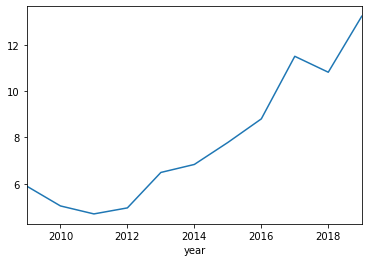

In [114]:
full_transfers.groupby('year').fee_in_millions_usd.mean().plot()

In [115]:
full_transfers.groupby('year').fee_in_millions_usd.nlargest(5)

year       
2009  8765     111.672
      8710      82.566
      8766      79.596
      8767      41.580
      8768      40.986
2010  203       69.498
      273       48.708
      8849      47.520
      295       43.956
      8882      39.204
2011  2206      49.896
      479       47.520
      8991      47.520
      9004      40.392
      3955      35.640
2012  2380      49.896
      2381      47.520
      4115      47.520
      567       41.580
      9261      41.580
2013  9428     119.988
      9366     104.782
      2500      76.626
      726       55.836
      2626      53.460
2014  9561      97.086
      995       89.100
      9568      89.100
      2760      58.806
      900       50.490
2015  1102      90.288
      1103      75.676
      2795      74.844
      1114      71.280
      1125      55.242
2016  1318     124.740
      7700     106.920
      1307      66.053
      1308      59.994
      1296      53.460
2017  3279     263.736
      10218    172.260
      10219    148.500

In [116]:
full_transfers[(full_transfers.year == 2017)].sort_values(by = 'fee_in_millions_usd', ascending = False).head(10)

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
3279,2017,2017/2018,Paris SG,Neymar,25,Left Winger,Barcelona,£199.80m,263.736,French Ligue 1
10218,2017,2017/2018,Barcelona,Philippe Coutinho,25,Left Winger,Liverpool,£130.50m,172.260,Spanish La Liga
10219,2017,2017/2018,Barcelona,Ousmane Dembele,20,Left Winger,Dortmund,£112.50m,148.500,Spanish La Liga
1506,2017,2017/2018,Man United,Romelu Lukaku,24,Striker,Everton,£76.23m,100.624,English Premier League
1495,2017,2017/2018,Liverpool,Virgil van Dijk,26,Center Back,Southampton,£76.19m,100.571,English Premier League
1468,2017,2017/2018,Chelsea,Alvaro Morata,24,Striker,Real Madrid,£59.40m,78.408,English Premier League
10225,2017,2017/2018,Ath Madrid,Diego Costa,29,Striker,Chelsea,£59.40m,78.408,Spanish La Liga
1483,2017,2017/2018,Man City,Aymeric Laporte,23,Center Back,Athletic,£58.50m,77.220,English Premier League
1501,2017,2017/2018,Arsenal,Pierre-Emerick Aubameyang,28,Striker,Dortmund,£57.38m,75.742,English Premier League
1484,2017,2017/2018,Man City,Benjamin Mendy,23,Left Back,Monaco,£51.75m,68.310,English Premier League


In [117]:
full_transfers[(full_transfers.year == 2013)].sort_values(by = 'fee_in_millions_usd', ascending = False).head(10)

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
9428,2013,2013/2014,Real Madrid,Gareth Bale,24,Right Winger,Spurs,£90.90m,119.988,Spanish La Liga
9366,2013,2013/2014,Barcelona,Neymar,21,Left Winger,Santos FC,£79.38m,104.782,Spanish La Liga
2500,2013,2013/2014,Paris SG,Edinson Cavani,26,Striker,Napoli,£58.05m,76.626,French Ligue 1
726,2013,2013/2014,Arsenal,Mesut Ozil,24,Attacking Midfielder,Real Madrid,£42.30m,55.836,English Premier League
2626,2013,2013/2014,Monaco,James Rodriguez,21,Attacking Midfielder,FC Porto,£40.50m,53.460,French Ligue 1
708,2013,2013/2014,Man United,Juan Mata,25,Attacking Midfielder,Chelsea,£40.26m,53.143,English Premier League
2627,2013,2013/2014,Monaco,Falcao,27,Striker,Ath Madrid,£38.70m,51.084,French Ligue 1
710,2013,2013/2014,Man City,Fernandinho,28,Defensive Midfielder,Shakhtar D.,£36.00m,47.520,English Premier League
6842,2013,2013/2014,Napoli,Gonzalo Higuain,25,Striker,Real Madrid,£35.10m,46.332,Italian Serie A
4286,2013,2013/2014,Bayern Munich,Mario Gotze,21,Attacking Midfielder,Dortmund,£33.30m,43.956,German Bundesliga


In [118]:
full_transfers[(full_transfers.year == 2015)].sort_values(by = 'fee_in_millions_usd', ascending = False).head(10)

,year,season,buying_club,player_name,age,position,selling_club,fee,fee_in_millions_usd,league_name
1102,2015,2015/2016,Man City,Kevin De Bruyne,24,Attacking Midfielder,Wolfsburg,£68.40m,90.288,English Premier League
1103,2015,2015/2016,Man City,Raheem Sterling,20,Right Winger,Liverpool,£57.33m,75.676,English Premier League
2795,2015,2015/2016,Paris SG,Angel Di Maria,27,Right Winger,Man Utd,£56.70m,74.844,French Ligue 1
1114,2015,2015/2016,Man United,Anthony Martial,19,Left Winger,Monaco,£54.00m,71.280,English Premier League
1125,2015,2015/2016,Liverpool,Christian Benteke,24,Striker,Aston Villa,£41.85m,55.242,English Premier League
1104,2015,2015/2016,Man City,Nicolas Otamendi,27,Center Back,Valencia,£40.14m,52.985,English Premier League
4594,2015,2015/2016,Wolfsburg,Julian Draxler,21,Attacking Midfielder,Schalke 04,£38.70m,51.084,German Bundesliga
1126,2015,2015/2016,Liverpool,Roberto Firmino,23,Striker,TSG Hoffenheim,£36.90m,48.708,English Premier League
7227,2015,2015/2016,Juventus,Paulo Dybala,21,Striker,Palermo,£36.00m,47.520,Italian Serie A
9765,2015,2015/2016,Real Madrid,Mateo Kovacic,21,Center Midfielder,Inter,£34.20m,45.144,Spanish La Liga


In [119]:
club_transfer_totals.to_excel('data/profit_loss.xlsx', index = False)

In [120]:
transfers.groupby('buying_club').fee_in_millions_usd.sum().sort_values(ascending = False).head(10)

buying_club
Man City       1987.059
Barcelona      1759.759
Real Madrid    1630.240
Chelsea        1621.170
Juventus       1605.770
Paris SG       1560.557
Man United     1483.866
Liverpool      1248.559
Ath Madrid     1211.254
Inter Milan    1144.168
Name: fee_in_millions_usd, dtype: float64